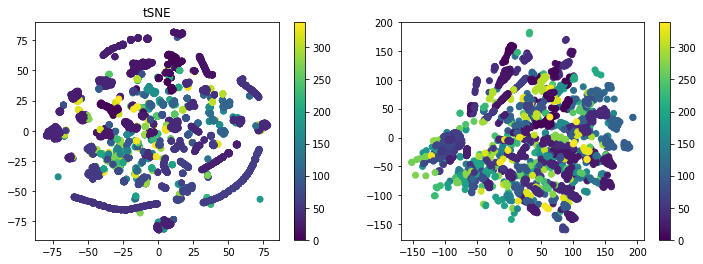

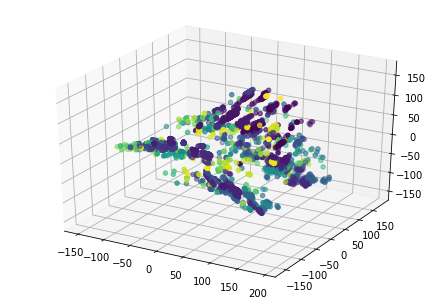

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D
#聚类相关库
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
#降维
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

#可视化
def plot(x,label):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    tsne = TSNE(n_components=2, learning_rate=80).fit_transform(x)
    plt.scatter(tsne[:, 0], tsne[:, 1], c=label)
    plt.title("tSNE")
    plt.colorbar()
    plt.subplot(122)
    pca = PCA().fit_transform(x)  
    plt.scatter(pca[:, 0], pca[:, 1], c=label)
    plt.colorbar()
    fig = plt.figure()
    axes3d = Axes3D(fig)
    pca = PCA(n_components=3).fit_transform(x)
    axes3d.scatter3D(pca[:, 0],pca[:, 1],pca[:, 2],c=label)
    
dataset = pd.read_csv('iBeacon_RSSI_Unlabeled.csv')
x = dataset.iloc[:,2:]

dbscan = DBSCAN(eps=80,min_samples=1,metric='euclidean').fit(x)
db_target=dbscan.labels_
plot(x,db_target)

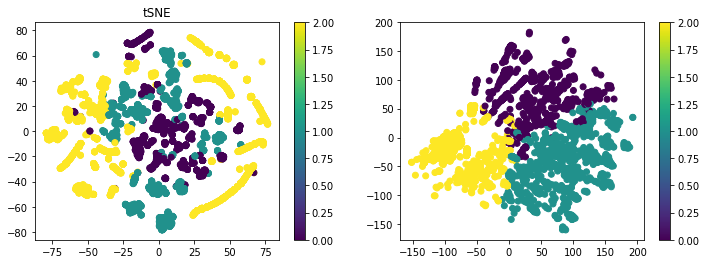

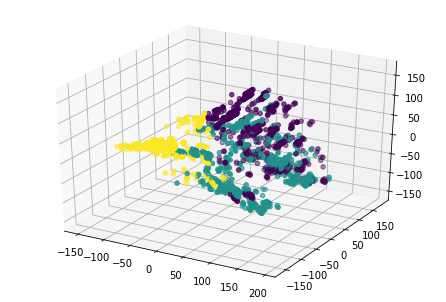

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
label=kmeans.labels_
plot(x,label)

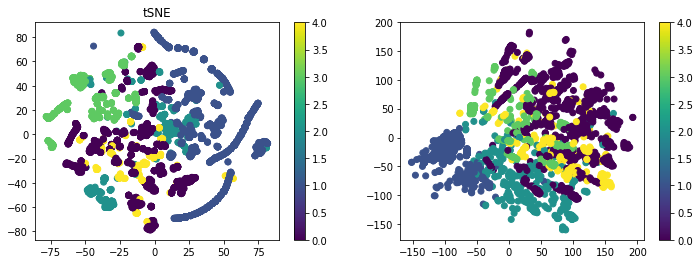

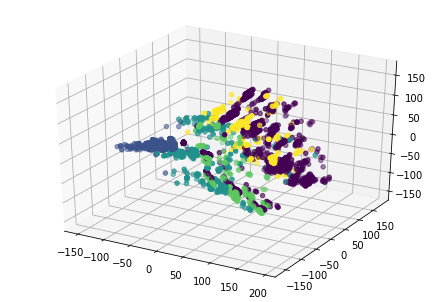

In [31]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=0).fit(x)
gmm_target=gmm.predict(x)
plot(x,gmm_target)

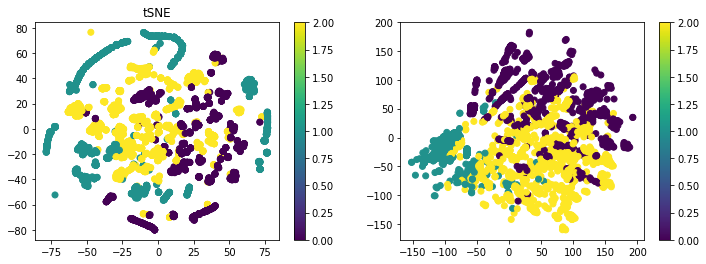

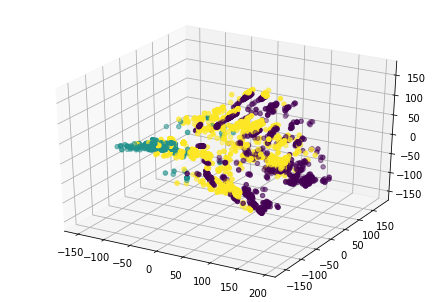

In [32]:
agg = AgglomerativeClustering(n_clusters=3).fit(x)
agg_target=agg.labels_
plot(x,agg_target)